# Grafos

## Herramientas

Para realizar los gráficos vamos a utilizar la librería `graphviz`. El paquete puede instalarse como

```
pip install graphviz
```

Además, para generar los graficos es necesario el interprete de  **DOT**, el cual es un lenguaje descriptivo en texto plano. Proporciona una forma simple de describir grafos, se puede instalar como

```
apt-get install dot
```

revisamos sus versiones con

```
pip show graphviz & dot --version
```

In [ ]:
dot = Digraph(node_attr={'color': 'lightblue2', 'style': 'filled', 'shape': 'record', 'height': '.1'})
shape = 'rectangle'

lista = [{'words':['h', 'chao', 'cosas']},
        {'words':['hola', 'b', 'c']},
        {'words':['chao', 'b', 'c']},
        {'words':['a', 'b', 'c']},
        {'words':['a', 'b', 'c']},
        {'words':['a', 'b', 'c']},
        {'words':['a', 'b', 'c']}]

for i, cosa in enumerate(lista):
 #words = cosa['words']
  #dot.node(f'node{i}', nohtml(f'<w0> {words[0]}{i} <w1> {words[1]}{i}|<w2> {words[2]}{i}'))
  dot.node(f'node{i}', r'{ <w2> a | <w3> b } | { <w0> a | <w1> b } | { <w4> a | <w5> b }')

dot.edge('node0:w1', 'node1:w0')
dot.edge('node0:w1', 'node2:w0')
dot.edge('node1:w1', 'node3:w0')
dot.edge('node1:w1', 'node4:w0')
dot.edge('node2:w1', 'node5:w0')
dot.edge('node2:w1', 'node6:w0')


In [62]:
lista_nodos = [{'id': 1,
  'parent': None,
  'hijos': [2, 3],
  'destacadas': {'biliary': 901,
   'as': 459,
   'are': 430,
   'surgery': 243,
   'it': 209,
   'sphincterotomy': 170}},
 {'id': 2,
  'parent': 1,
  'hijos': [4, 5],
  'destacadas': {'by': 595,
   'cholecystectomy': 543,
   'this': 472,
   'study': 309,
   'all': 222,
   'there': 157}},
 {'id': 3,
  'parent': 1,
  'hijos': [6, 7],
  'destacadas': {'gallbladder': 740,
   'endoscopic': 584,
   'cholecystectomy': 543,
   'after': 408,
   'cases': 386,
   'retrograde': 245}},
 {'id': 4,
  'parent': 2,
  'hijos': [8, 9],
  'destacadas': {'by': 595,
   'cholecystectomy': 543,
   'laparoscopic': 433,
   'pancreatitis': 301,
   'surgery': 243,
   'liver': 223}},
 {'id': 5,
  'parent': 2,
  'hijos': None,
  'destacadas': {'after': 408,
   'cholangiography': 406,
   'cases': 386,
   'study': 309,
   'clinical': 207,
   'no': 198}},
 {'id': 6,
  'parent': 3,
  'hijos': None,
  'destacadas': {'biliary': 901,
   'after': 408,
   'diagnosis': 329,
   'been': 245,
   'liver': 223,
   'no': 198}},
 {'id': 7,
  'parent': 3,
  'hijos': None,
  'destacadas': {'endoscopic': 584,
   'cholecystectomy': 543,
   'laparoscopic': 433,
   'retrograde': 245}},
 {'id': 8,
  'parent': 4,
  'hijos': None,
  'destacadas': {'by': 595,
   'cholecystectomy': 543,
   'as': 459,
   'laparoscopic': 433,
   'management': 179,
   'intraoperative': 174}},
 {'id': 9,
  'parent': 4,
  'hijos': None,
  'destacadas': {'endoscopic': 584,
   'diagnosis': 329,
   'choledocholithiasis': 235,
   'one': 220,
   'ultrasound': 216,
   'these': 201}}]

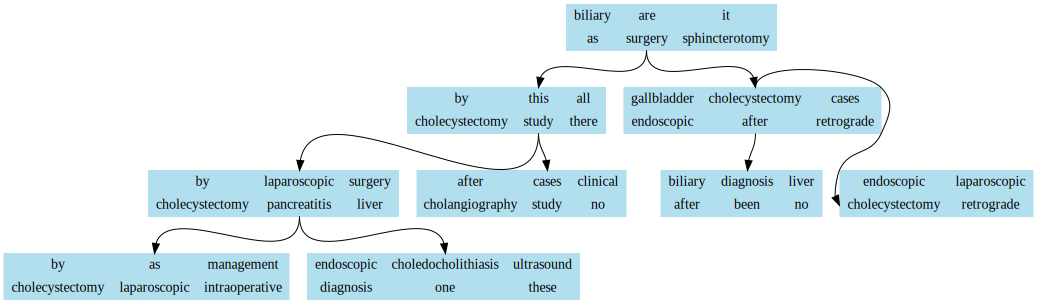

In [63]:
from IPython.display import display
from graphviz import Digraph, nohtml

dot = Digraph(node_attr={'color': 'lightblue2',
                         'style': 'filled',
                         'shape': 'record',
                         'height': '.1',
                         'label':"Curve edges"})
                         #splines=ortho,
                         #nodesep=0.8
    

def agregar_palabras(grafo, elemento):
  x = list(elemento['destacadas'].keys())
  largo = len(x)
  retorno = ''
  for i in range(0, largo, 2):
    a, b = i, i+1
    actual = f'<w{a}> {x[a]} | <w{b}> {x[b]}'
    retorno += '{ ' + actual + ' }'
    if b < largo-1:
      retorno += ' | '
  dot.node(f"node{elemento['id']}", nohtml(retorno))


  
for cosa in lista_nodos:
  agregar_palabras(dot, cosa)
  largo = len(cosa['destacadas'])
  largo = 6
  if cosa['parent']:
    
    if (largo/2) % 2 == 1:
      p = int( (len(cosa['destacadas'])/2 + 1)/2)
      dot.edge(f"node{cosa['parent']}:w{p+1}", f"node{cosa['id']}:w{p}")
    else:
      dot.edge(f"node{cosa['parent']}", f"node{cosa['id']}")
        
display(dot)